In [1]:
import catboost
import sklearn
import pandas as pd
import plotly.plotly as py
from sklearn.datasets import make_regression
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

### Generate toy data

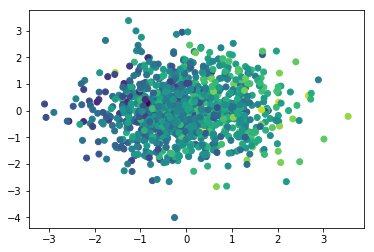

In [3]:
n_features = 3
X, y = make_regression(n_samples=1000, n_features=10, n_informative=n_features)
plt.scatter(X[:, 0], X[:, 1], c=y)
X = pd.DataFrame(X)
X.columns = ['Column_{}'.format(i) for i in range(X.shape[1])]

cat_values_1 = ['A', 'B', 'C']
cat_values_2 = ['some', 'random', 'categorical', 'feature', 'values', 'testing']
X.loc[:, 'CatColumn_1'] = [cat_values_1[np.random.randint(0, len(cat_values_1))] for _ in range(X.shape[0])]
X.loc[:, 'CatColumn_2'] = [cat_values_2[np.random.randint(0, len(cat_values_2))] for _ in range(X.shape[0])]

In [4]:
X.sample(3)

,Column_0,Column_1,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,CatColumn_1,CatColumn_2
381,-0.327602,-0.217969,-0.282919,-0.375895,1.237910,-0.295342,0.705585,0.263990,1.387461,0.607313,B,categorical
436,-1.063441,1.395011,0.373172,1.266960,0.486257,-1.419991,-0.531783,0.803252,1.489199,0.406227,A,random
219,-0.449294,0.201714,-0.669889,0.361741,-1.363782,0.197995,-1.653662,-0.194320,-1.346906,-0.833025,C,feature


### Train model and plot statistics

In [5]:
model = catboost.CatBoostRegressor(cat_features=['CatColumn_1', 'CatColumn_2'], 
                                   one_hot_max_size=300, iterations=500)
model.fit(X, y, silent=True)

#### Float feature

In [6]:
feature_num = 'Column_2'
res = model.get_binarized_statistics(X, y, feature_num, plot=True)

#### One-Hot feature

In [7]:
feature_num = 'CatColumn_2'
res = model.get_binarized_statistics(X, y, feature_num, cat_feature_values=cat_values_2, plot=True)

### Test on Titanic dataset

In [8]:
import catboost
import sklearn
import numpy as np
import pandas as pd
import plotly.plotly as py
from sklearn.datasets import make_regression, make_classification
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [9]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [10]:
from catboost.datasets import titanic

In [11]:
titanic_train, titanic_test = titanic()

In [12]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
titanic_train_target = titanic_train.Survived
titanic_train.drop(['PassengerId', 'Survived', 'Name', 'Parch', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)

In [14]:
titanic_train.head()

,Pclass,Sex,Age,SibSp,Fare
0,3,male,22.0,1,7.2500
1,1,female,38.0,1,71.2833
2,3,female,26.0,0,7.9250
3,1,female,35.0,1,53.1000
4,3,male,35.0,0,8.0500


In [15]:
model = catboost.CatBoostClassifier(
    iterations=200, 
    cat_features=['Pclass', 'Sex', 'SibSp'], 
    one_hot_max_size=300)
model.fit(titanic_train, titanic_train_target, silent=True)

In [16]:
titanic_train.dtypes

Pclass      int64
Sex        object
Age       float64
SibSp       int64
Fare      float64
dtype: object

#### Float feature

In [17]:
feature = 'Fare'
res = model.get_binarized_statistics(titanic_train, titanic_train_target, feature, plot=True)

#### One-hot feature

In [18]:
feature = 'Sex'
res = model.get_binarized_statistics(titanic_train, titanic_train_target, feature, 
                                     cat_feature_values=['male', 'female'], plot=True)